### Imoporting Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

### Importing CSV File

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Shape of Dataset

In [3]:
df.shape

(100000, 9)

### Checking Null Counts

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Duplicate Values Count

In [5]:
df.duplicated().sum()

3854

### Remove Duplicate Values

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(96146, 9)

### Columns in DataFrame

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

### Unique Values in Given Columns 

In [9]:
columns = ["gender", "hypertension", "heart_disease", "smoking_history", "diabetes"]

for col in columns:
    print(col, df[col].unique())

gender ['Female' 'Male' 'Other']
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes [0 1]


In [10]:
df[df['gender'] == "Other"].shape

(18, 9)

In [11]:
df[df['smoking_history'] == "No Info"].shape

(32887, 9)

In [12]:
df[df['smoking_history'] == "not current"].shape

(6367, 9)

In [13]:
df[df['smoking_history'] == "former"].shape

(9299, 9)

### Summary of DataFrame

In [14]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### Count of Individuals by Smoking History

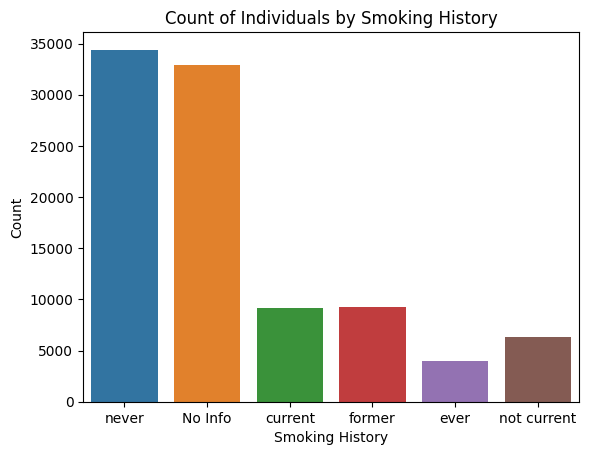

In [15]:
sns.countplot(x='smoking_history', data=df)
plt.title('Count of Individuals by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

### Age Distribution

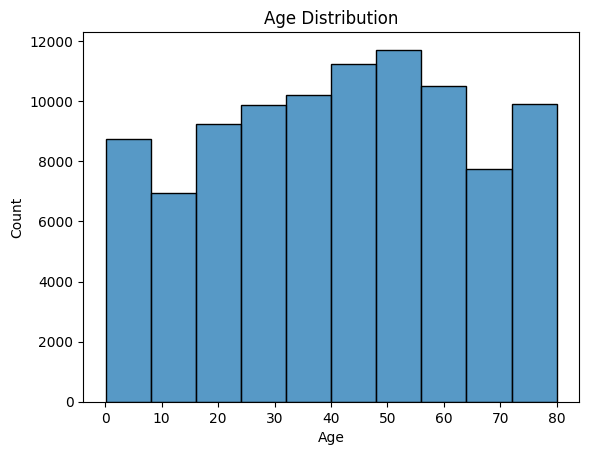

In [16]:
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

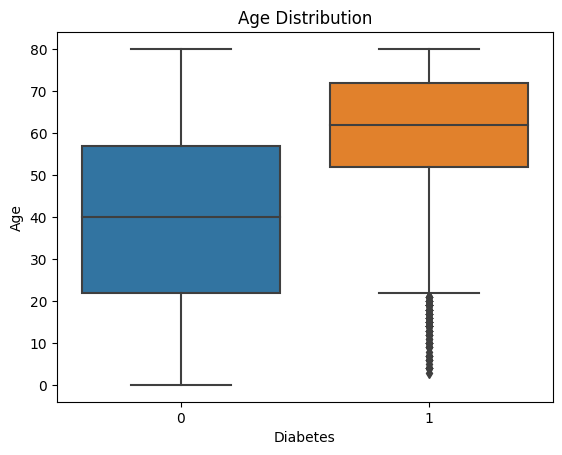

In [17]:
sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title('Age Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

### BMI Distribution

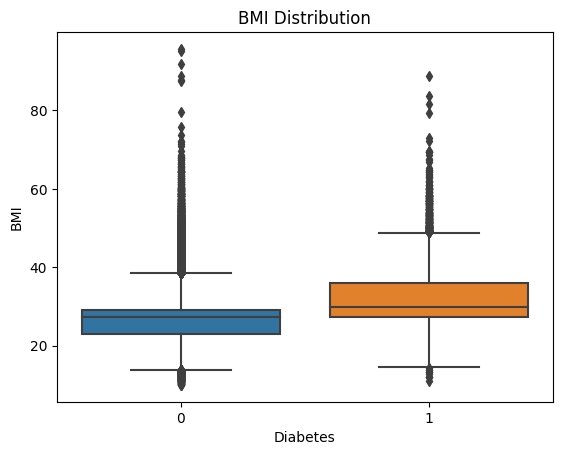

In [18]:
sns.boxplot(x=df['diabetes'], y=df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

### HbA1c Level Distribution

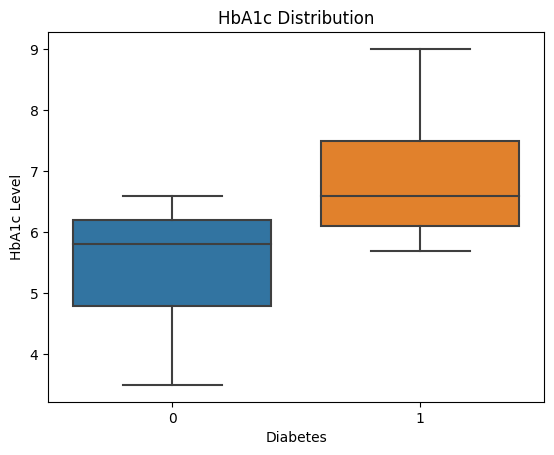

In [19]:
sns.boxplot(x=df['diabetes'], y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()

### Blood Glucose Level Distribution

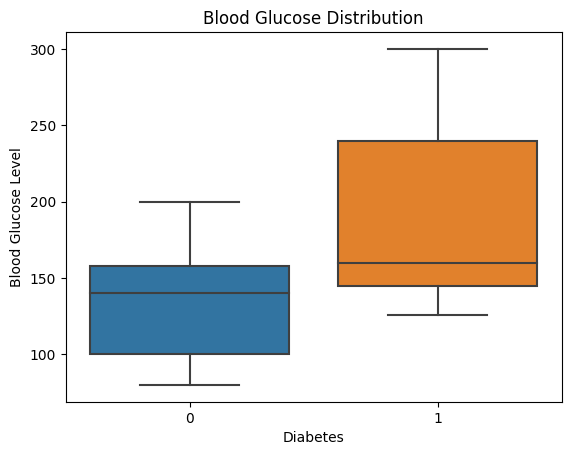

In [20]:
sns.boxplot(x=df['diabetes'], y=df['blood_glucose_level'])
plt.title('Blood Glucose Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

### Correlation Heatmap

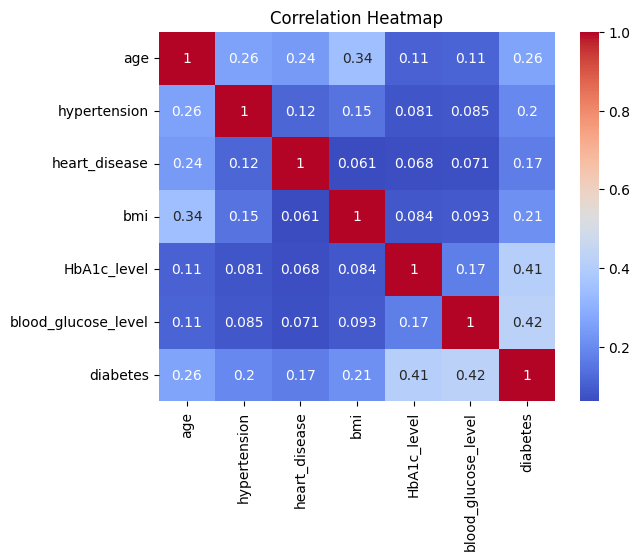

In [21]:
corr = df[['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Doing One-Hot Encoding of 'gender' and 'smoking_history' columns

In [22]:
dummy_df = pd.get_dummies(df[["gender","smoking_history"]], drop_first=True)
dummy_df.head()

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0


### Concatinating One-Hot Encoding columns with other columns

In [23]:
X = pd.concat([df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']],dummy_df], axis=1)
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


### Scaling X

In [24]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X[0]

array([1.        , 0.        , 1.        , 0.17717087, 0.56363636,
       0.27272727, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

### Defining y

In [25]:
y = df['diabetes']

### Value Counts of y; is person diabetic or not

In [26]:
y.value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

We can see our y is imbalanced. So for solving this problem, we oversample our dataset with creating imaginary '1' values in dataset.

### SMOTE

In [27]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

0    87664
1    87664
Name: diabetes, dtype: int64

### Defining with different algorithms with there parameters

In [28]:
algos = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', None]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
            'loss': ['log_loss', 'deviance', 'exponential']
        }
    },
    'bagging_classifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {
        }
    },
    'multinomial_naive_bayes': {
        'model': MultinomialNB(),
        'params': {
        }
    }
}

### Training all algorithms and finding best parameter and saving model score in 'scores'

In [29]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^

### Creating DataFrame with 'scores' list

In [30]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,logistic_regression,0.885855,{'penalty': 'l2'}
1,SVM,0.896595,{}
2,decision_tree,0.963726,"{'criterion': 'gini', 'splitter': 'best'}"
3,random_forest,0.975115,"{'criterion': 'log_loss', 'n_estimators': 50}"
4,ada_boost_classifier,0.956322,{'n_estimators': 100}
5,gradient_boosting_classifier,0.957788,"{'loss': 'log_loss', 'n_estimators': 100}"
6,bagging_classifier,0.976022,{'n_estimators': 50}
7,gaussian_naive_bayes,0.645486,{}
8,multinomial_naive_bayes,0.617322,{}


### Split X and y

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

### Training our model

In [32]:
model = RandomForestClassifier(n_estimators=50, criterion='log_loss')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=50)

### Accuracy Score

In [33]:
model.score(X_test, y_test)

0.9744196657731136

### Predicting for X_test

In [34]:
y_pred = model.predict(X_test)

### Confusion Matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17085,   448],
       [  449, 17084]], dtype=int64)

### Heatmap of Confusion Matrix

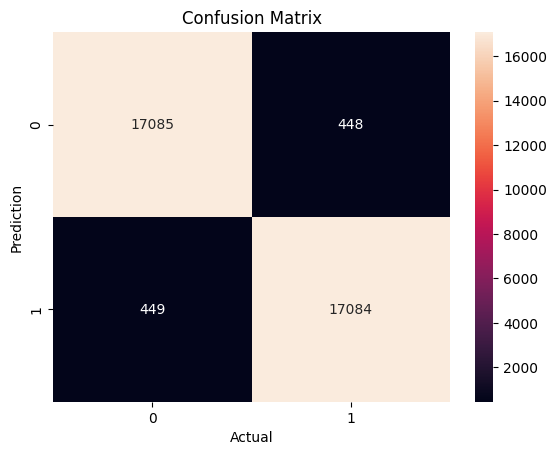

In [36]:
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17533
           1       0.97      0.97      0.97     17533

    accuracy                           0.97     35066
   macro avg       0.97      0.97      0.97     35066
weighted avg       0.97      0.97      0.97     35066



### Principal Component Analysis(PCA)
For reducing dimensions of dataset

In [38]:
pca = PCA(0.95)

X_pca = pca.fit_transform(X)

### Shape of X after PCA 

In [39]:
X_pca.shape

(175328, 10)

### Training our model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=10, stratify=y)
model = RandomForestClassifier(n_estimators=50, criterion='log_loss')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.949438202247191

### Confusion Matrix

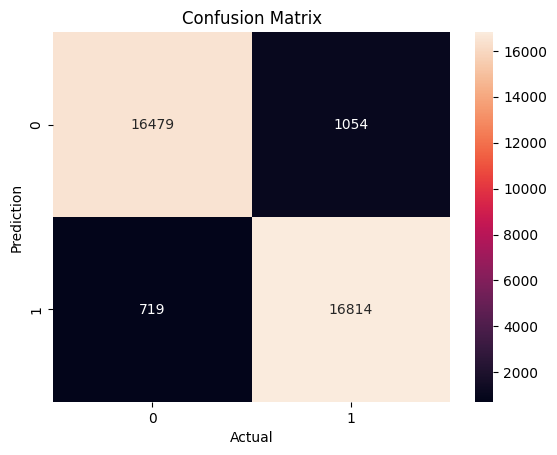

In [41]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17533
           1       0.94      0.96      0.95     17533

    accuracy                           0.95     35066
   macro avg       0.95      0.95      0.95     35066
weighted avg       0.95      0.95      0.95     35066

